In [74]:
import numpy as np
import os
import PIL
from PIL import Image
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import skimage
from skimage.transform import resize
import cv2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.layers import Activation, Dense

print(tf.__version__)

2.6.0


In [147]:
import pathlib

PATH = "C:\\Users\\HP\\Desktop\\Project\\num"
file_path = pathlib.Path(PATH)

train_dir = os.path.join(file_path, '.\\train')


BATCH_SIZE = 64
IMG_SIZE = (64, 64)

#train data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

#valid data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print(class_names)

# MobileNetV2
img_shape = (64,64, 3)

pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                              include_top=False,
                              weights='imagenet')

last_layer = pre_trained_model.get_layer('out_relu')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

x = tf.keras.layers.Dropout(0.5)(last_output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='sigmoid')(x)
x = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/num_base_model.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

with tf.device('/device:GPU:0'):

    epochs=15
    hist_num = model.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Found 16500 files belonging to 11 classes.
Using 13200 files for training.
Found 16500 files belonging to 11 classes.
Using 3300 files for validation.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']


In [154]:
import pathlib

PATH = "C:\\Users\\HP\\Desktop\\Project\\num"
file_path = pathlib.Path(PATH)

train_dir = os.path.join(file_path, '.\\train')


BATCH_SIZE = 64
IMG_SIZE = (64, 64)

#train data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

#valid data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print(class_names)

Found 16500 files belonging to 11 classes.
Using 13200 files for training.
Found 16500 files belonging to 11 classes.
Using 3300 files for validation.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']


In [120]:
# # MobileNetV2
# img_shape = (64,64, 3)

# pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
#                               include_top=False,
#                               weights='imagenet')

In [122]:
# last_layer = pre_trained_model.get_layer('out_relu')
# print('last layer output shape: ', last_layer.output.shape)
# last_output = last_layer.output

last layer output shape:  (None, 2, 2, 1280)


In [123]:

# x = tf.keras.layers.Dropout(0.5)(last_output)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(1024, activation='sigmoid')(x)
# x = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# model = tf.keras.Model(pre_trained_model.input, x)

# model.compile(optimizer='adam',
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy'])

In [152]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# # 학습이 언제 자동 중단 될지를 설정합니다.
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# #최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
# modelpath="./data/model/num_base_model.hdf5"

# # 최적화 모델을 업데이트하고 저장합니다.
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# with tf.device('/device:GPU:0'):

#     epochs=15
#     hist_num = model.fit(train_ds, epochs=epochs,
#                    validation_steps=2,validation_data=(val_ds),
#                    verbose=1, callbacks=[early_stopping_callback,checkpointer])

<Figure size 864x288 with 0 Axes>

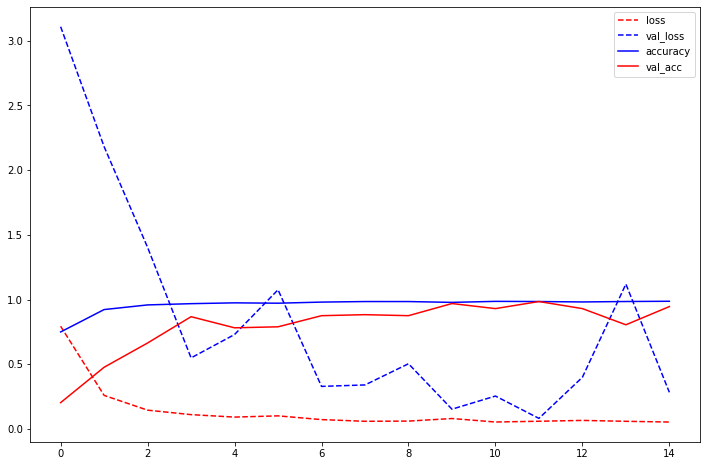

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(hist_num.history['loss'],'--',c='red')
plt.plot(hist_num.history['val_loss'],'--',c='blue')
plt.plot(hist_num.history['accuracy'],c='blue')
plt.plot(hist_num.history['val_accuracy'],c='red')
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

------------------------------------VGG16----------------------------------------

In [173]:
#vVGG16
img_shape = (64,64, 3)

pre_trained_model = tf.keras.applications.VGG16(input_shape=img_shape,
                              include_top=False,
                              weights='imagenet')

In [181]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [182]:
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 2, 2, 512)


In [183]:


x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(class_names, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [179]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/num_base_model_VGG.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

with tf.device('/device:GPU:0'):

    epochs=15
    hist_num = model.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/15
207/207 [==============================] - 14s 64ms/step - loss: nan - accuracy: 0.0917 - val_loss: nan - val_accuracy: 0.0859
Epoch 2/15
  1/207 [..............................] - ETA: 25s - loss: nan - accuracy: 0.1406

C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\callbacks.py:1833: RuntimeWarning: invalid value encountered in less
  return self.monitor_op(monitor_value - self.min_delta, reference_value)
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\callbacks.py:1412: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


207/207 [==============================] - 13s 63ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.0859
Epoch 3/15
207/207 [==============================] - 13s 64ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.0625
Epoch 4/15
207/207 [==============================] - 13s 63ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.1094
Epoch 5/15
207/207 [==============================] - 13s 63ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.1016
Epoch 6/15
207/207 [==============================] - 13s 64ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.1328
Epoch 7/15
207/207 [==============================] - 13s 63ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.0859
Epoch 8/15
207/207 [==============================] - 13s 63ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.0859
Epoch 9/15
207/207 [=========================

<Figure size 864x288 with 0 Axes>

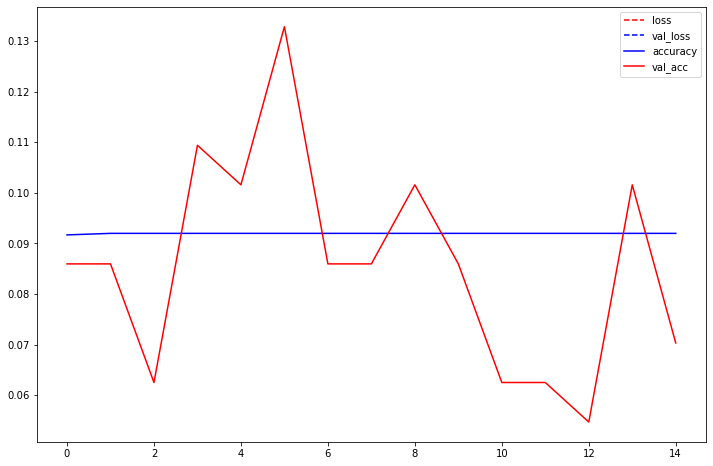

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(hist_num.history['loss'],'--',c='red')
plt.plot(hist_num.history['val_loss'],'--',c='blue')
plt.plot(hist_num.history['accuracy'],c='blue')
plt.plot(hist_num.history['val_accuracy'],c='red')
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

In [138]:
import pathlib

PATH = "C:\\Users\\HP\\Desktop\\Project\\num"
file_path = pathlib.Path(PATH)

train_dir = os.path.join(file_path, '.\\train')


BATCH_SIZE = 64
IMG_SIZE = (75, 75)

#train data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

#valid data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

class_names = train_ds.class_names

# InceptionV3
img_shape = (75,75, 3)

pre_trained_model = tf.keras.applications.InceptionV3 (input_shape=img_shape,
                              include_top=False,
                              weights='imagenet')

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

x = tf.keras.layers.Dropout(0.5)(last_output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='sigmoid')(x)
x = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/num_base_model.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

with tf.device('/device:GPU:0'):

    epochs=15
    hist_num = model.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])


Found 16500 files belonging to 11 classes.
Using 13200 files for training.
Found 16500 files belonging to 11 classes.
Using 3300 files for validation.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']


<Figure size 864x288 with 0 Axes>

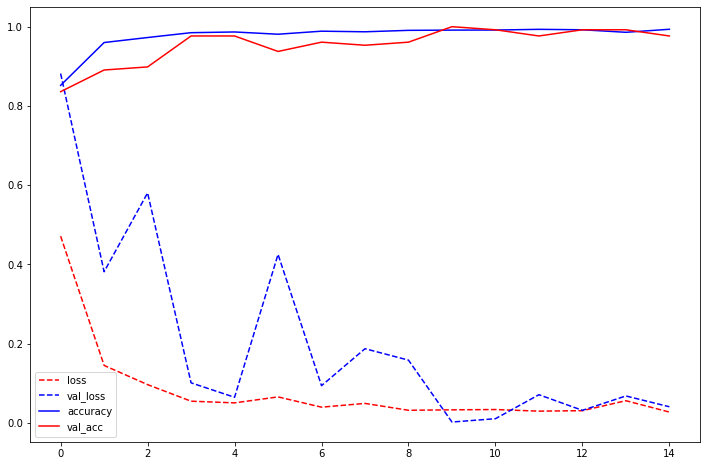

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.title('')
plt.plot(hist_num.history['loss'],'--',c='red')
plt.plot(hist_num.history['val_loss'],'--',c='blue')
plt.plot(hist_num.history['accuracy'],c='blue')
plt.plot(hist_num.history['val_accuracy'],c='red')
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

In [89]:
import pathlib

PATH = "C:\\Users\\HP\\Desktop\\Project\\num"
file_path = pathlib.Path(PATH)

train_dir = os.path.join(file_path, '.\\train')


BATCH_SIZE = 64
IMG_SIZE = (75, 75)

#train data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

#valid data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print(class_names)

Found 16500 files belonging to 11 classes.
Using 13200 files for training.
Found 16500 files belonging to 11 classes.
Using 3300 files for validation.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']


In [104]:

#local_weights_file = 'weight'

img_shape = (75,75, 3)

pre_trained_model = tf.keras.applications.InceptionV3(input_shape=img_shape,
                              include_top=False,
                              weights='imagenet')

In [105]:
#pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 37, 37, 32)   864         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_286 (BatchN (None, 37, 37, 32)   96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 37, 37, 32)   0           batch_normalization_286[0][0]    
_______________________________________________________________________________________

In [106]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 768)


In [107]:


x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
#x = tf.keras.layers.Dense(1024, activation='sigmoid')(x)
x = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [108]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 37, 37, 32)   864         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_286 (BatchN (None, 37, 37, 32)   96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 37, 37, 32)   0           batch_normalization_286[0][0]    
___________________________________________________________________________________________

In [109]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/num_base_model_InceptionV3.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

with tf.device('/device:GPU:0'):

    epochs=15
    hist_num = model.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/15
207/207 [==============================] - 7s 22ms/step - loss: 2248.6096 - accuracy: 0.0917 - val_loss: 2.3957 - val_accuracy: 0.0938
Epoch 2/15
207/207 [==============================] - 4s 18ms/step - loss: 2.3991 - accuracy: 0.0903 - val_loss: 2.3984 - val_accuracy: 0.0781
Epoch 3/15
207/207 [==============================] - 4s 18ms/step - loss: 2.3978 - accuracy: 0.0916 - val_loss: 2.3973 - val_accuracy: 0.0781
Epoch 4/15
207/207 [==============================] - 4s 18ms/step - loss: 2.4021 - accuracy: 0.0878 - val_loss: 2.3988 - val_accuracy: 0.0625
Epoch 5/15
159/207 [======================>.......] - ETA: 0s - loss: 2.4001 - accuracy: 0.0901

KeyboardInterrupt: 

In [20]:
prediction_layer = tf.keras.layers.Dense(len(class_names), activation ='softmax')

In [21]:
model = tf.keras.Sequential([
    pre_trained_model,
    prediction_layer
])

In [ ]:
model.

In [ ]:
pre_trained_model.load_weights(local_weights_file)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:

from tensorflow.keras.models import load_model
base_model = load_model('.\\data\\model\\model_VGG16_adam_best.hdf5')

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
base_model.summary()

In [ ]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# feature_batch_average = global_average_layer(feature_batch)
# print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(len(class_names))
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
inputs = tf.keras.Input(shape=(64, 64, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
# x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):

    epochs=15
    history_num = model.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1)

In [ ]:
from tensorflow.keras.models import load_model
base_model = load_model('.\\data\\model\\model_VGG16_adam_best.hdf5')

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
base_model.summary()

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    ]
)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(8 * 8 * 16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, )
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        #  크기조정(torch.view는 numpy의 reshape)임
        x = x.view(-1, 8 * 8 * 16)  
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x